# ¬øQu√© es la Regresi√≥n Lasso?

Lasso significa "Least Absolute Shrinkage and Selection Operator" (Operador de Reducci√≥n y Selecci√≥n por M√≠nimos Absolutos). Es una t√©cnica de regresi√≥n regularizada que extiende la regresi√≥n lineal ordinaria agregando una penalizaci√≥n espec√≠fica.
En t√©rminos simples: Imagina que tienes muchas variables para predecir algo (como predecir el precio de una casa usando √°rea, ubicaci√≥n, n√∫mero de habitaciones, etc.). Lasso no solo encuentra la mejor relaci√≥n entre estas variables y el precio, sino que tambi√©n puede "eliminar" autom√°ticamente las variables menos importantes, simplificando tu modelo.

Imagina que tienes muchas variables para predecir algo (como predecir el precio de una casa usando √°rea, ubicaci√≥n, n√∫mero de habitaciones, etc.). Lasso no solo encuentra la mejor relaci√≥n entre estas variables y el precio, sino que tambi√©n puede "eliminar" autom√°ticamente las variables menos importantes, simplificando tu modelo.

**Definici√≥n T√©cnica**
La regresi√≥n Lasso minimiza la funci√≥n:
Funci√≥n objetivo = Error cuadr√°tico medio + Œª √ó Suma de valores absolutos de los coeficientes
Matem√°ticamente:

$min[¬Ωn √ó ||y - XŒ≤||¬≤ + Œª √ó ||Œ≤||‚ÇÅ]$

Donde:

- $y$ son los valores reales
- $X$ son las variables predictoras
- $Œ≤$ son los coeficientes
- $Œª (lambda)$ es el par√°metro de penalizaci√≥n
- $||Œ≤||‚ÇÅ$ es la norma L1 (suma de valores absolutos)

**Ventajas de Lasso**

- Selecci√≥n autom√°tica de variables: Puede reducir coeficientes a exactamente cero, eliminando variables irrelevantes
- Previene sobreajuste: La regularizaci√≥n mejora la generalizaci√≥n del modelo
- Interpretabilidad: Produce modelos m√°s simples y f√°ciles de interpretar
- Manejo de multicolinealidad: Ayuda cuando las variables est√°n correlacionadas
- Eficiente computacionalmente: Existen algoritmos r√°pidos para su implementaci√≥n

**Desventajas de Lasso**

- Selecci√≥n arbitraria en grupos correlacionados: Si varias variables est√°n muy correlacionadas, Lasso puede elegir solo una aleatoriamente
- Limitaci√≥n en variables vs observaciones: Si tienes m√°s variables que observaciones, Lasso selecciona m√°ximo n variables
- No agrupa variables relacionadas: A diferencia de Elastic Net, no maneja bien grupos de variables correlacionadas
- Sensible a la escala: Requiere estandarizaci√≥n de variables
- Puede ser muy agresivo: Puede eliminar variables importantes si Œª es muy alto

## ¬øCu√°ndo usar Regresi√≥n Lasso?
Usa Lasso cuando:

- Tienes muchas variables y sospechas que solo algunas son realmente importantes
- Quieres un modelo interpretable y simple
- Necesitas selecci√≥n autom√°tica de caracter√≠sticas
- Hay indicios de sobreajuste en regresi√≥n lineal simple
- Los datos tienen alta dimensionalidad

## No uses Lasso cuando:

- Sabes que todas las variables son importantes
- Tienes grupos de variables altamente correlacionadas que deben mantenerse juntas
- El dataset es muy peque√±o (menos de 50 observaciones t√≠picamente)
- La relaci√≥n no es lineal (considera otros m√©todos)

## Par√°metro de Penalizaci√≥n ($Œª$ - Lambda)

**¬øQu√© es Œª?**

Lambda controla qu√© tan fuerte es la penalizaci√≥n. Es el par√°metro m√°s importante de Lasso.
Comportamiento de Œª:

- $Œª = 0$: Regresi√≥n lineal ordinaria (sin penalizaci√≥n)
- $Œª$ peque√±o: Poca penalizaci√≥n, modelo similar a regresi√≥n lineal
- $Œª$ grande: Mucha penalizaci√≥n, muchos coeficientes se vuelven cero
- $Œª$ muy grande: Todos los coeficientes se vuelven cero (modelo constante)

**¬øC√≥mo elegir $Œª$?**

- Validaci√≥n cruzada: M√©todo m√°s com√∫n y confiable
- Criterios de informaci√≥n: AIC, BIC
- Curva de regularizaci√≥n: Visualizar c√≥mo cambian los coeficientes
- Regla de 1 error est√°ndar: Seleccionar el $Œª$ m√°s grande dentro de 1 SE del m√≠nimo error

Calculando coeficientes para diferentes valores de Œª...


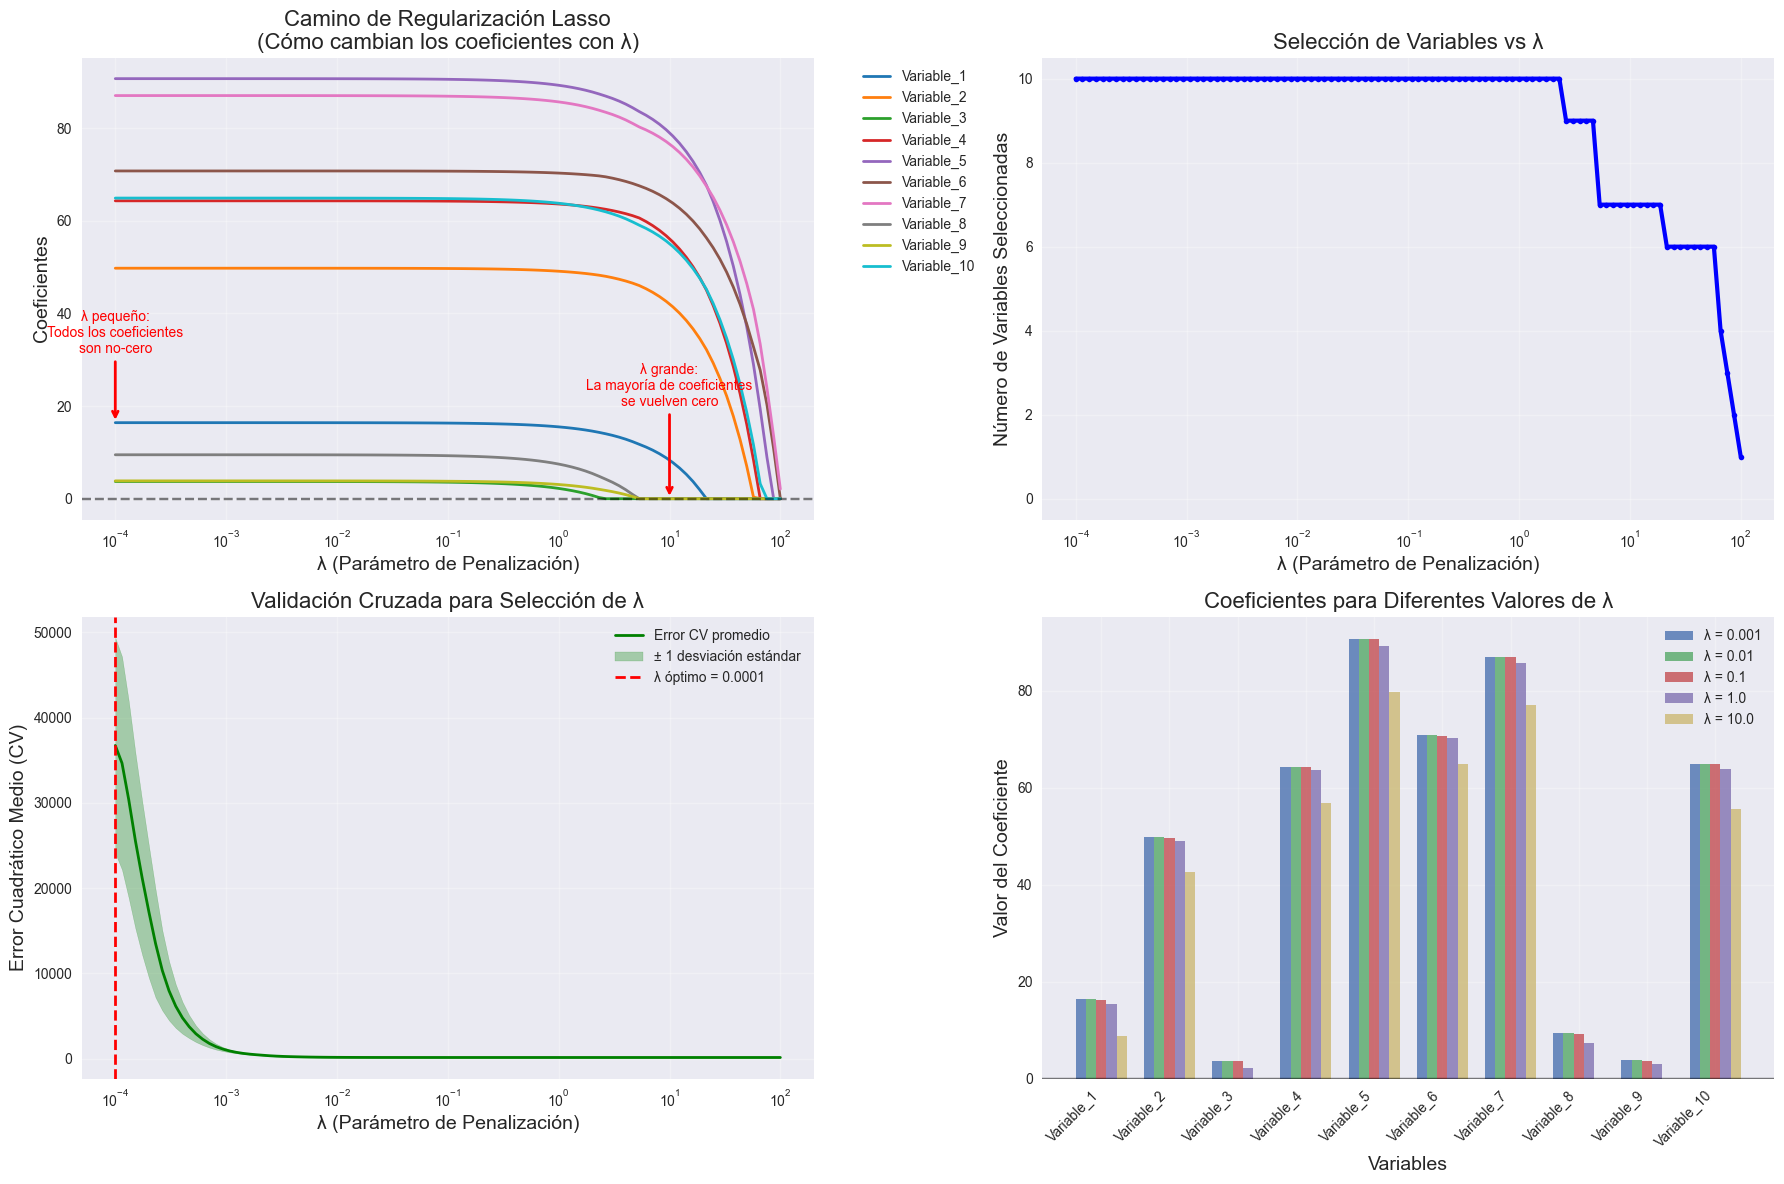


AN√ÅLISIS CUANTITATIVO DEL EFECTO DE Œª

Œª √≥ptimo encontrado por validaci√≥n cruzada: 0.0001
Error de validaci√≥n cruzada m√≠nimo: 120.61

Efecto de Œª en la selecci√≥n de variables:
Œª = 0.001 ‚Üí 10 variables seleccionadas
Œª = 0.010 ‚Üí 10 variables seleccionadas
Œª = 0.100 ‚Üí 10 variables seleccionadas
Œª = 1.000 ‚Üí 10 variables seleccionadas
Œª = 10.000 ‚Üí  7 variables seleccionadas

Coeficientes con Œª √≥ptimo:
Variable_1:  16.4139
Variable_2:  49.7584
Variable_3:   3.7149
Variable_4:  64.3051
Variable_5:  90.6792
Variable_6:  70.7529
Variable_7:  87.0259
Variable_8:   9.4837
Variable_9:   3.8470
Variable_10:  64.8991

INTERPRETACI√ìN:
1. Con Œª peque√±o: Todos los coeficientes son no-cero (similar a regresi√≥n lineal)
2. Al aumentar Œª: Los coeficientes se 'encogen' hacia cero
3. Con Œª grande: La mayor√≠a de coeficientes se vuelven exactamente cero
4. La validaci√≥n cruzada nos ayuda a encontrar el Œª √≥ptimo
5. Lasso realiza selecci√≥n autom√°tica de variables


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Configurar estilo de gr√°ficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# Crear datos sint√©ticos
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear nombres para las caracter√≠sticas
feature_names = [f'Variable_{i+1}' for i in range(X.shape[1])]

# Definir un rango de valores lambda (alpha en sklearn)
alphas = np.logspace(-4, 2, 100)  # desde 0.0001 hasta 100

# Almacenar los coeficientes para cada alpha
coefficients = []

print("Calculando coeficientes para diferentes valores de Œª...")
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefficients.append(lasso.coef_)

coefficients = np.array(coefficients)

# Crear el gr√°fico principal: Regularization Path
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Gr√°fico 1: Camino de Regularizaci√≥n (Regularization Path)
colors = plt.cm.tab10(np.linspace(0, 1, X.shape[1]))
for i in range(X.shape[1]):
    ax1.plot(alphas, coefficients[:, i], color=colors[i], 
             linewidth=2, label=feature_names[i])

ax1.set_xscale('log')
ax1.set_xlabel('Œª (Par√°metro de Penalizaci√≥n)', fontsize=14)
ax1.set_ylabel('Coeficientes', fontsize=14)
ax1.set_title('Camino de Regularizaci√≥n Lasso\n(C√≥mo cambian los coeficientes con Œª)', fontsize=16)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# A√±adir anotaciones explicativas
ax1.annotate('Œª peque√±o:\nTodos los coeficientes\nson no-cero', 
             xy=(0.0001, coefficients[0, 0]), xytext=(0.0001, coefficients[0, 0] + 15),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, ha='center', color='red')

ax1.annotate('Œª grande:\nLa mayor√≠a de coeficientes\nse vuelven cero', 
             xy=(10, 0), xytext=(10, 20),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, ha='center', color='red')

# Gr√°fico 2: N√∫mero de variables seleccionadas vs Œª
n_nonzero = np.sum(np.abs(coefficients) > 1e-5, axis=1)
ax2.plot(alphas, n_nonzero, 'b-', linewidth=3, marker='o', markersize=4)
ax2.set_xscale('log')
ax2.set_xlabel('Œª (Par√°metro de Penalizaci√≥n)', fontsize=14)
ax2.set_ylabel('N√∫mero de Variables Seleccionadas', fontsize=14)
ax2.set_title('Selecci√≥n de Variables vs Œª', fontsize=16)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.5, X.shape[1] + 0.5)

# Gr√°fico 3: Validaci√≥n cruzada para encontrar el mejor Œª
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_scaled, y)

# Calcular errores de validaci√≥n cruzada
mse_path = lasso_cv.mse_path_.mean(axis=1)
std_path = lasso_cv.mse_path_.std(axis=1)

ax3.plot(alphas, mse_path, 'g-', linewidth=2, label='Error CV promedio')
ax3.fill_between(alphas, mse_path - std_path, mse_path + std_path, 
                alpha=0.3, color='green', label='¬± 1 desviaci√≥n est√°ndar')
ax3.axvline(lasso_cv.alpha_, color='red', linestyle='--', linewidth=2, 
           label=f'Œª √≥ptimo = {lasso_cv.alpha_:.4f}')
ax3.set_xscale('log')
ax3.set_xlabel('Œª (Par√°metro de Penalizaci√≥n)', fontsize=14)
ax3.set_ylabel('Error Cuadr√°tico Medio (CV)', fontsize=14)
ax3.set_title('Validaci√≥n Cruzada para Selecci√≥n de Œª', fontsize=16)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Gr√°fico 4: Comparaci√≥n de coeficientes para diferentes Œª
# Seleccionar algunos valores espec√≠ficos de Œª para comparar
lambda_examples = [0.001, 0.01, 0.1, 1.0, 10.0]
width = 0.15
x_pos = np.arange(len(feature_names))

for i, lambda_val in enumerate(lambda_examples):
    # Encontrar el √≠ndice m√°s cercano a lambda_val
    idx = np.argmin(np.abs(alphas - lambda_val))
    ax4.bar(x_pos + i*width, coefficients[idx], width, 
           label=f'Œª = {lambda_val}', alpha=0.8)

ax4.set_xlabel('Variables', fontsize=14)
ax4.set_ylabel('Valor del Coeficiente', fontsize=14)
ax4.set_title('Coeficientes para Diferentes Valores de Œª', fontsize=16)
ax4.set_xticks(x_pos + width * 2)
ax4.set_xticklabels(feature_names, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

# Mostrar informaci√≥n cuantitativa
print("\n" + "="*60)
print("AN√ÅLISIS CUANTITATIVO DEL EFECTO DE Œª")
print("="*60)

print(f"\nŒª √≥ptimo encontrado por validaci√≥n cruzada: {lasso_cv.alpha_:.4f}")
print(f"Error de validaci√≥n cruzada m√≠nimo: {min(mse_path):.2f}")

print("\nEfecto de Œª en la selecci√≥n de variables:")
for i, lambda_val in enumerate([0.001, 0.01, 0.1, 1.0, 10.0]):
    idx = np.argmin(np.abs(alphas - lambda_val))
    n_selected = np.sum(np.abs(coefficients[idx]) > 1e-5)
    print(f"Œª = {lambda_val:5.3f} ‚Üí {n_selected:2d} variables seleccionadas")

print("\nCoeficientes con Œª √≥ptimo:")
lasso_optimal = Lasso(alpha=lasso_cv.alpha_)
lasso_optimal.fit(X_scaled, y)
for i, coef in enumerate(lasso_optimal.coef_):
    if abs(coef) > 1e-5:
        print(f"{feature_names[i]}: {coef:8.4f}")
    else:
        print(f"{feature_names[i]}: {coef:8.4f} (eliminada)")

print("\n" + "="*60)
print("INTERPRETACI√ìN:")
print("="*60)
print("1. Con Œª peque√±o: Todos los coeficientes son no-cero (similar a regresi√≥n lineal)")
print("2. Al aumentar Œª: Los coeficientes se 'encogen' hacia cero")
print("3. Con Œª grande: La mayor√≠a de coeficientes se vuelven exactamente cero")
print("4. La validaci√≥n cruzada nos ayuda a encontrar el Œª √≥ptimo")
print("5. Lasso realiza selecci√≥n autom√°tica de variables")

# üë®‚Äçüíªüìâ caso pr√°ctico

El mercado de aguacates en Estados Unidos representa una industria multimillonaria con patrones de consumo y precios altamente variables. Este dataset contiene informaci√≥n hist√≥rica de ventas de aguacates recopilada por la Junta de Aguacates Hass (Hass Avocado Board) entre 2015 y 2018, abarcando m√∫ltiples regiones metropolitanas de EE.UU.
El problema central que abordaremos es la predicci√≥n del precio promedio de aguacates utilizando informaci√≥n de vol√∫menes de venta, caracter√≠sticas del producto, ubicaci√≥n geogr√°fica y factores temporales. Esta es una aplicaci√≥n pr√°ctica crucial para:

- Productores: Optimizar estrategias de precio y planificaci√≥n de cosechas
- Distribuidores: Gestionar inventarios y m√°rgenes de ganancia
- Retailers: Establecer precios competitivos y pron√≥sticos de demanda
- Analistas de mercado: Identificar factores que impulsan las fluctuaciones de precios

La regresi√≥n Lasso es particularmente valiosa en este contexto porque nos permitir√° identificar autom√°ticamente cu√°les de las m√∫ltiples variables disponibles son verdaderamente relevantes para determinar el precio, simplificando el modelo y haci√©ndolo m√°s interpretable para la toma de decisiones comerciales.

## **üìä DESCRIPCI√ìN DE VARIABLES**

Variable       | Tipo       | Descripci√≥n                                    | Unidad/Valores
---------------|------------|------------------------------------------------|--------------------------------
AveragePrice   | Num√©rica   | üéØ Variable objetivo: Precio promedio         | D√≥lares USD ($)
Date           | Temporal   | Fecha de la observaci√≥n semanal               | Formato YYYY-MM-DD
Total Volume   | Num√©rica   | Volumen total de aguacates vendidos           | Unidades individuales
4046           | Num√©rica   | Volumen aguacates peque√±os (PLU 4046)         | Unidades individuales
4225           | Num√©rica   | Volumen aguacates grandes (PLU 4225)          | Unidades individuales
4770           | Num√©rica   | Volumen aguacates extra grandes (PLU 4770)    | Unidades individuales
Total Bags     | Num√©rica   | N√∫mero total de bolsas vendidas               | Unidades de bolsas
Small Bags     | Num√©rica   | N√∫mero de bolsas peque√±as vendidas            | Unidades de bolsas
Large Bags     | Num√©rica   | N√∫mero de bolsas grandes vendidas             | Unidades de bolsas
XLarge Bags    | Num√©rica   | N√∫mero de bolsas extra grandes vendidas       | Unidades de bolsas
type           | Categ√≥rica | Tipo de aguacate                              | "conventional" u "organic"
year           | Num√©rica   | A√±o de la observaci√≥n                         | 2015, 2016, 2017, 2018
region         | Categ√≥rica | Regi√≥n geogr√°fica de venta                    | 54 regiones diferentes

## **üîç Notas Importantes sobre las Variables:**
**Variables de Volumen:**

Los c√≥digos PLU (Price Look-Up) son est√°ndares de la industria para clasificar aguacates por tama√±o
- PLU 4046: Aguacates peque√±os (t√≠picamente 173-285g)
- PLU 4225: Aguacates grandes (t√≠picamente 285-454g)
- PLU 4770: Aguacates extra grandes (t√≠picamente >454g)

**Variables de Bolsas:**

- Las bolsas representan empaques pre-portionados vendidos en supermercados
- Existe una relaci√≥n jer√°rquica: Total Bags = Small Bags + Large Bags + XLarge Bags
- Importante para detectar multicolinealidad

**Variables Categ√≥ricas:**

- Tipo: Los aguacates org√°nicos t√≠picamente tienen precios premium
- Regi√≥n: Incluye ciudades individuales y regiones agregadas como "TotalUS"

**Consideraciones para Modelado:**

- Posible multicolinealidad entre variables de volumen
- Estacionalidad en patrones de precio y consumo
- Heterogeneidad regional en preferencias y precios
- Tendencias temporales en adopci√≥n de aguacates org√°nicos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de visualizaci√≥n
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11
sns.set_palette("husl")

## PASO 1: CARGA Y EXPLORACI√ìN INICIAL DE DATOS

In [3]:
df = pd.read_csv('avocado.csv').drop('Unnamed: 0',axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [4]:
print("üìà Informaci√≥n b√°sica del dataset:")
print(f"‚Ä¢ Filas: {df.shape[0]:,}")
print(f"‚Ä¢ Columnas: {df.shape[1]}")
print(f"‚Ä¢ Per√≠odo: {df['Date'].min().strftime('%Y-%m-%d')} a {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"‚Ä¢ Valores faltantes: {df.isnull().sum().sum()}")

üìà Informaci√≥n b√°sica del dataset:
‚Ä¢ Filas: 18,249
‚Ä¢ Columnas: 13
‚Ä¢ Per√≠odo: 2015-01-04 a 2018-03-25
‚Ä¢ Valores faltantes: 0


In [5]:
print("\nüéØ Estad√≠sticas de la variable objetivo (AveragePrice):")
price_stats = df['AveragePrice'].describe()
for stat, value in price_stats.items():
    print(f"‚Ä¢ {stat.capitalize()}: ${value:.2f}")
    
print(f"\nü•ë Distribuci√≥n por tipo:")
type_counts = df['type'].value_counts()
for tipo, count in type_counts.items():
    percentage = (count / len(df)) * 100
    print(f"‚Ä¢ {tipo.capitalize()}: {count:,} ({percentage:.1f}%)")

print(f"\nüó∫Ô∏è N√∫mero de regiones √∫nicas: {df['region'].nunique()}")


üéØ Estad√≠sticas de la variable objetivo (AveragePrice):
‚Ä¢ Count: $18249.00
‚Ä¢ Mean: $1.41
‚Ä¢ Std: $0.40
‚Ä¢ Min: $0.44
‚Ä¢ 25%: $1.10
‚Ä¢ 50%: $1.37
‚Ä¢ 75%: $1.66
‚Ä¢ Max: $3.25

ü•ë Distribuci√≥n por tipo:
‚Ä¢ Conventional: 9,126 (50.0%)
‚Ä¢ Organic: 9,123 (50.0%)

üó∫Ô∏è N√∫mero de regiones √∫nicas: 54


## PASO 2: AN√ÅLISIS EXPLORATORIO DE DATOS (EDA)

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('An√°lisis Exploratorio - Dataset Aguacates', fontsize=16, fontweight='bold')

# 1. Distribuci√≥n del precio
axes[0,0].hist(df['AveragePrice'], bins=40, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribuci√≥n del Precio Promedio')
axes[0,0].set_xlabel('Precio ($)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].axvline(df['AveragePrice'].mean(), color='red', linestyle='--', 
                  label=f'Media: ${df["AveragePrice"].mean():.2f}')
axes[0,0].legend()

# 2. Precios por tipo
df.boxplot(column='AveragePrice', by='type', ax=axes[0,1])
axes[0,1].set_title('Distribuci√≥n de Precios por Tipo')
axes[0,1].set_xlabel('Tipo de Aguacate')

# 3. Evoluci√≥n temporal
monthly_prices = df.groupby(df['Date'].dt.to_period('M'))['AveragePrice'].mean()
axes[0,2].plot(monthly_prices.index.astype(str), monthly_prices.values, color='green', linewidth=2)
axes[0,2].set_title('Evoluci√≥n Temporal de Precios')
axes[0,2].set_xlabel('Per√≠odo')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Correlaci√≥n precio vs volumen total
axes[1,0].scatter(df['Total Volume'], df['AveragePrice'], alpha=0.5, s=10)
axes[1,0].set_title('Precio vs Volumen Total')
axes[1,0].set_xlabel('Volumen Total')
axes[1,0].set_ylabel('Precio ($)')

# 5. Precios por a√±o
df.boxplot(column='AveragePrice', by='year', ax=axes[1,1])
axes[1,1].set_title('Distribuci√≥n de Precios por A√±o')
axes[1,1].set_xlabel('A√±o')

# 6. Top regiones por precio promedio
top_regions = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).head(8)
axes[1,2].bar(range(len(top_regions)), top_regions.values, color='orange', alpha=0.7)
axes[1,2].set_title('Top 8 Regiones - Precio Promedio')
axes[1,2].set_xticks(range(len(top_regions)))
axes[1,2].set_xticklabels(top_regions.index, rotation=45, ha='right')
axes[1,2].set_ylabel('Precio Promedio ($)')

# 7. Matriz de correlaci√≥n de variables num√©ricas
numeric_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
corr_matrix = df[numeric_cols].corr()
im = axes[2,0].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[2,0].set_xticks(range(len(numeric_cols)))
axes[2,0].set_yticks(range(len(numeric_cols)))
axes[2,0].set_xticklabels(numeric_cols, rotation=45, ha='right')
axes[2,0].set_yticklabels(numeric_cols)
axes[2,0].set_title('Matriz de Correlaci√≥n')
plt.colorbar(im, ax=axes[2,0])

# 8. Distribuci√≥n de vol√∫menes por tipo PLU
plu_cols = ['4046', '4225', '4770']
plu_means = [df[col].mean() for col in plu_cols]
axes[2,1].bar(plu_cols, plu_means, color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.7)
axes[2,1].set_title('Volumen Promedio por Tipo PLU')
axes[2,1].set_ylabel('Volumen Promedio')

# 9. Seasonalidad mensual
df['month'] = df['Date'].dt.month
monthly_trend = df.groupby('month')['AveragePrice'].mean()
axes[2,2].plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2, markersize=6)
axes[2,2].set_title('Estacionalidad de Precios')
axes[2,2].set_xlabel('Mes')
axes[2,2].set_ylabel('Precio Promedio ($)')
axes[2,2].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

# An√°lisis de correlaciones
print("üîç An√°lisis de correlaciones importantes:")
price_corrs = df[numeric_cols].corr()['AveragePrice'].sort_values(key=abs, ascending=False)[1:]
for var, corr in price_corrs.items():
    strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "d√©bil"
    direction = "positiva" if corr > 0 else "negativa"
    print(f"‚Ä¢ {var}: {corr:.3f} (correlaci√≥n {strength} {direction})")

üîç An√°lisis de correlaciones importantes:
‚Ä¢ 4046: -0.208 (correlaci√≥n d√©bil negativa)
‚Ä¢ Total Volume: -0.193 (correlaci√≥n d√©bil negativa)
‚Ä¢ 4770: -0.179 (correlaci√≥n d√©bil negativa)
‚Ä¢ Total Bags: -0.177 (correlaci√≥n d√©bil negativa)
‚Ä¢ Small Bags: -0.175 (correlaci√≥n d√©bil negativa)
‚Ä¢ Large Bags: -0.173 (correlaci√≥n d√©bil negativa)
‚Ä¢ 4225: -0.173 (correlaci√≥n d√©bil negativa)
‚Ä¢ XLarge Bags: -0.118 (correlaci√≥n d√©bil negativa)


## PASO 3: INGENIER√çA DE CARACTER√çSTICAS

In [32]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

In [7]:
# Crear copia para transformaciones
df_model = df.copy()

# 3.1 Caracter√≠sticas temporales
print("3.1 Creando caracter√≠sticas temporales...")
df_model['month'] = df_model['Date'].dt.month
df_model['quarter'] = df_model['Date'].dt.quarter
df_model['week_of_year'] = df_model['Date'].dt.isocalendar().week
df_model['is_holiday_season'] = df_model['month'].isin([11, 12]).astype(int)

# 3.2 Caracter√≠sticas de proporciones
print("3.2 Creando caracter√≠sticas de proporciones...")
df_model['pct_4046'] = df_model['4046'] / (df_model['Total Volume'] + 1e-8)
df_model['pct_4225'] = df_model['4225'] / (df_model['Total Volume'] + 1e-8)
df_model['pct_4770'] = df_model['4770'] / (df_model['Total Volume'] + 1e-8)
df_model['pct_bags'] = df_model['Total Bags'] / (df_model['Total Volume'] + 1e-8)

# 3.3 Caracter√≠sticas de interacci√≥n
print("3.3 Creando caracter√≠sticas de interacci√≥n...")
df_model['volume_per_bag'] = df_model['Total Volume'] / (df_model['Total Bags'] + 1e-8)
df_model['large_to_small_bags'] = df_model['Large Bags'] / (df_model['Small Bags'] + 1e-8)

# 3.4 Transformaciones logar√≠tmicas para variables con sesgo
print("3.4 Aplicando transformaciones logar√≠tmicas...")
volume_cols = ['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags']

for col in volume_cols:
    df_model[f'log_{col}'] = np.log1p(df_model[col])

# 3.5 Codificaci√≥n de variables categ√≥ricas
print("3.5 Codificando variables categ√≥ricas...")
le_type = LabelEncoder()
le_region = LabelEncoder()

df_model['type_encoded'] = le_type.fit_transform(df_model['type'])
df_model['region_encoded'] = le_region.fit_transform(df_model['region'])

# One-hot encoding para regiones principales (las m√°s frecuentes)
top_regions = df_model['region'].value_counts().head(10).index
for region in top_regions:
    df_model[f'region_{region}'] = (df_model['region'] == region).astype(int)

print(f"‚úÖ Caracter√≠sticas creadas. Total de columnas: {df_model.shape[1]}")


3.1 Creando caracter√≠sticas temporales...
3.2 Creando caracter√≠sticas de proporciones...
3.3 Creando caracter√≠sticas de interacci√≥n...
3.4 Aplicando transformaciones logar√≠tmicas...
3.5 Codificando variables categ√≥ricas...
‚úÖ Caracter√≠sticas creadas. Total de columnas: 42


## PASO 4: SELECCI√ìN DE VARIABLES Y PREPARACI√ìN

In [8]:
# Definir caracter√≠sticas para el modelo
feature_columns = [
    # Variables originales de volumen (transformadas)
    'log_Total_Volume', 'log_4046', 'log_4225', 'log_4770', 
    'log_Total_Bags', 'log_Small_Bags', 'log_Large_Bags',
    
    # Caracter√≠sticas de proporci√≥n
    'pct_4046', 'pct_4225', 'pct_4770', 'pct_bags',
    
    # Caracter√≠sticas de interacci√≥n
    'volume_per_bag', 'large_to_small_bags',
    
    # Variables categ√≥ricas
    'type_encoded', 'region_encoded',
    
    # Variables temporales
    'year', 'month', 'quarter', 'week_of_year', 'is_holiday_season'
]

# Agregar regiones principales como dummies
region_dummies = [col for col in df_model.columns if col.startswith('region_')]
feature_columns.extend(region_dummies)

print(f"üîç Variables seleccionadas para el modelo: {len(feature_columns)}")
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")


üîç Variables seleccionadas para el modelo: 31
 1. log_Total_Volume
 2. log_4046
 3. log_4225
 4. log_4770
 5. log_Total_Bags
 6. log_Small_Bags
 7. log_Large_Bags
 8. pct_4046
 9. pct_4225
10. pct_4770
11. pct_bags
12. volume_per_bag
13. large_to_small_bags
14. type_encoded
15. region_encoded
16. year
17. month
18. quarter
19. week_of_year
20. is_holiday_season
21. region_encoded
22. region_Albany
23. region_Atlanta
24. region_BaltimoreWashington
25. region_Boise
26. region_Boston
27. region_BuffaloRochester
28. region_California
29. region_Charlotte
30. region_Chicago
31. region_CincinnatiDayton


In [9]:
feature_columns = ['log_Total Volume',
 'log_4046',
 'log_4225',
 'log_4770',
 'log_Total Bags',
 'log_Small Bags',
 'log_Large Bags',
 'pct_4046',
 'pct_4225',
 'pct_4770',
 'pct_bags',
 'volume_per_bag',
 'large_to_small_bags',
 'type_encoded',
 'region_encoded',
 'year',
 'month',
 'quarter',
 'week_of_year',
 'is_holiday_season',
 'region_encoded',
 'region_Albany',
 'region_Atlanta',
 'region_BaltimoreWashington',
 'region_Boise',
 'region_Boston',
 'region_BuffaloRochester',
 'region_California',
 'region_Charlotte',
 'region_Chicago',
 'region_CincinnatiDayton']

In [11]:
# Preparar datos para modelado
X = df_model[feature_columns].fillna(0)  # Rellenar NaN si existen
y = df_model['AveragePrice']

print(f"\nüìê Dimensiones finales:")
print(f"‚Ä¢ X (caracter√≠sticas): {X.shape}")
print(f"‚Ä¢ y (objetivo): {y.shape}")

# Verificar multicolinealidad
correlation_matrix = X.corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print(f"\n‚ö†Ô∏è Variables con alta correlaci√≥n (>0.8):")
    for var1, var2, corr in high_corr_pairs[:5]:  # Mostrar solo las primeras 5
        print(f"‚Ä¢ {var1} ‚Üî {var2}: {corr:.3f}")
    if len(high_corr_pairs) > 5:
        print(f"... y {len(high_corr_pairs) - 5} pares m√°s")
else:
    print("\n‚úÖ No se detectaron correlaciones extremas entre variables")



üìê Dimensiones finales:
‚Ä¢ X (caracter√≠sticas): (18249, 31)
‚Ä¢ y (objetivo): (18249,)

‚ö†Ô∏è Variables con alta correlaci√≥n (>0.8):
‚Ä¢ log_Total Volume ‚Üî log_4046: 0.887
‚Ä¢ log_Total Volume ‚Üî log_4225: 0.909
‚Ä¢ log_Total Volume ‚Üî log_4770: 0.834
‚Ä¢ log_Total Volume ‚Üî log_Total Bags: 0.935
‚Ä¢ log_Total Volume ‚Üî log_Small Bags: 0.877
... y 5 pares m√°s


## PASO 5: DIVISI√ìN DE DATOS Y ESTANDARIZACI√ìN

In [12]:
# Divisi√≥n estratificada por tipo y a√±o
stratify_col = df_model['type'] + '_' + df_model['year'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_col
)

print(f"Divisi√≥n de datos:")
print(f"‚Ä¢ Entrenamiento: {X_train.shape[0]:,} observaciones ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"‚Ä¢ Prueba: {X_test.shape[0]:,} observaciones ({X_test.shape[0]/len(X)*100:.1f}%)")

# Estandarizaci√≥n
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n‚úÖ Datos estandarizados:")
print(f"‚Ä¢ Media de caracter√≠sticas en entrenamiento: {X_train_scaled.mean():.6f}")
print(f"‚Ä¢ Desviaci√≥n est√°ndar en entrenamiento: {X_train_scaled.std():.6f}")

Divisi√≥n de datos:
‚Ä¢ Entrenamiento: 14,599 observaciones (80.0%)
‚Ä¢ Prueba: 3,650 observaciones (20.0%)

‚úÖ Datos estandarizados:
‚Ä¢ Media de caracter√≠sticas en entrenamiento: 0.000000
‚Ä¢ Desviaci√≥n est√°ndar en entrenamiento: 1.000000


## PASO 6: IMPLEMENTACI√ìN DE REGRESI√ìN LASSO

In [16]:
# 6.1 B√∫squeda del lambda √≥ptimo con validaci√≥n cruzada
print("6.1 B√∫squeda del Œª √≥ptimo con validaci√≥n cruzada de 5 pliegues...")

# Definir rango de alphas (lambdas)
alphas = np.logspace(-4, 2, 100)  # De 0.0001 a 100

# Validaci√≥n cruzada
lasso_cv = LassoCV(
    alphas=alphas, 
    cv=5, 
    random_state=42, 
    max_iter=5000,
    n_jobs=-1
)

lasso_cv.fit(X_train_scaled, y_train)

print(f"‚Ä¢ Œª √≥ptimo encontrado: {lasso_cv.alpha_:.6f}")
print(f"‚Ä¢ Score R¬≤ en validaci√≥n cruzada: {lasso_cv.score(X_train_scaled, y_train):.4f}")
print(f"‚Ä¢ Error MSE m√≠nimo en CV: {lasso_cv.mse_path_.mean(axis=1).min():.6f}")

# 6.2 Entrenar modelo final con lambda √≥ptimo
print("\n6.2 Entrenando modelo Lasso final...")
lasso_final = Lasso(alpha=lasso_cv.alpha_, max_iter=5000, random_state=42)
lasso_final.fit(X_train_scaled, y_train)

# 6.3 Modelo de comparaci√≥n: Regresi√≥n Lineal
print("6.3 Entrenando modelo de regresi√≥n lineal para comparaci√≥n...")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

print("‚úÖ Modelos entrenados exitosamente")

6.1 B√∫squeda del Œª √≥ptimo con validaci√≥n cruzada de 5 pliegues...
‚Ä¢ Œª √≥ptimo encontrado: 0.000100
‚Ä¢ Score R¬≤ en validaci√≥n cruzada: 0.6098
‚Ä¢ Error MSE m√≠nimo en CV: 0.063297

6.2 Entrenando modelo Lasso final...
6.3 Entrenando modelo de regresi√≥n lineal para comparaci√≥n...
‚úÖ Modelos entrenados exitosamente


## PASO 7: EVALUACI√ìN DE MODELOS

In [17]:
# Predicciones
y_train_pred_lasso = lasso_final.predict(X_train_scaled)
y_test_pred_lasso = lasso_final.predict(X_test_scaled)

y_train_pred_linear = linear_model.predict(X_train_scaled)
y_test_pred_linear = linear_model.predict(X_test_scaled)

# Funci√≥n para calcular m√©tricas
def calculate_comprehensive_metrics(y_true, y_pred, dataset_name, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{model_name} - {dataset_name}:")
    print(f"‚Ä¢ RMSE: ${rmse:.4f}")
    print(f"‚Ä¢ MAE:  ${mae:.4f}")
    print(f"‚Ä¢ R¬≤:   {r2:.4f}")
    print(f"‚Ä¢ MAPE: {mape:.2f}%")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# Calcular m√©tricas para ambos conjuntos
print("üèãÔ∏è M√âTRICAS DE ENTRENAMIENTO:")
train_lasso = calculate_comprehensive_metrics(y_train, y_train_pred_lasso, "Entrenamiento", "Lasso")
train_linear = calculate_comprehensive_metrics(y_train, y_train_pred_linear, "Entrenamiento", "Lineal")

print("\nüéØ M√âTRICAS DE PRUEBA:")
test_lasso = calculate_comprehensive_metrics(y_test, y_test_pred_lasso, "Prueba", "Lasso")
test_linear = calculate_comprehensive_metrics(y_test, y_test_pred_linear, "Prueba", "Lineal")

# An√°lisis de overfitting
print("\nüîç AN√ÅLISIS DE OVERFITTING:")
lasso_overfit = train_lasso['R2'] - test_lasso['R2']
linear_overfit = train_linear['R2'] - test_linear['R2']

print(f"‚Ä¢ Lasso - Diferencia R¬≤ (train-test): {lasso_overfit:.4f}")
print(f"‚Ä¢ Lineal - Diferencia R¬≤ (train-test): {linear_overfit:.4f}")

if lasso_overfit < linear_overfit:
    print("‚úÖ Lasso muestra menor overfitting")
else:
    print("‚ö†Ô∏è Regresi√≥n lineal muestra menor overfitting")

üèãÔ∏è M√âTRICAS DE ENTRENAMIENTO:

Lasso - Entrenamiento:
‚Ä¢ RMSE: $0.2510
‚Ä¢ MAE:  $0.1956
‚Ä¢ R¬≤:   0.6098
‚Ä¢ MAPE: 14.79%

Lineal - Entrenamiento:
‚Ä¢ RMSE: $0.2510
‚Ä¢ MAE:  $0.1956
‚Ä¢ R¬≤:   0.6099
‚Ä¢ MAPE: 14.79%

üéØ M√âTRICAS DE PRUEBA:

Lasso - Prueba:
‚Ä¢ RMSE: $0.2595
‚Ä¢ MAE:  $0.2007
‚Ä¢ R¬≤:   0.5915
‚Ä¢ MAPE: 15.05%

Lineal - Prueba:
‚Ä¢ RMSE: $0.2595
‚Ä¢ MAE:  $0.2007
‚Ä¢ R¬≤:   0.5914
‚Ä¢ MAPE: 15.05%

üîç AN√ÅLISIS DE OVERFITTING:
‚Ä¢ Lasso - Diferencia R¬≤ (train-test): 0.0183
‚Ä¢ Lineal - Diferencia R¬≤ (train-test): 0.0185
‚úÖ Lasso muestra menor overfitting


## PASO 8: AN√ÅLISIS DE COEFICIENTES Y SELECCI√ìN DE VARIABLES

In [24]:
# Comparaci√≥n de coeficientes
coef_comparison = pd.DataFrame({
    'Variable': feature_columns,
    'Lasso_Coef': lasso_final.coef_,
    'Linear_Coef': linear_model.coef_,
    'Lasso_Abs': np.abs(lasso_final.coef_)
})

# Ordenar por importancia en Lasso
coef_comparison = coef_comparison.sort_values('Lasso_Abs', ascending=False)

# Variables seleccionadas vs eliminadas
threshold = 1e-6
selected_vars = coef_comparison[coef_comparison['Lasso_Abs'] > threshold]
eliminated_vars = coef_comparison[coef_comparison['Lasso_Abs'] <= threshold]

print(f"üìå RESUMEN DE SELECCI√ìN DE VARIABLES:")
print(f"‚Ä¢ Variables seleccionadas por Lasso: {len(selected_vars)} de {len(feature_columns)}")
print(f"‚Ä¢ Variables eliminadas por Lasso: {len(eliminated_vars)}")
print(f"‚Ä¢ Porcentaje de reducci√≥n: {(len(eliminated_vars)/len(feature_columns))*100:.1f}%")

print(f"\nüèÜ TOP 10 VARIABLES M√ÅS IMPORTANTES (seg√∫n Lasso):")
for i, (_, row) in enumerate(selected_vars.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Variable']:<20} ‚Üí Coef: {row['Lasso_Coef']:8.4f}")

if len(eliminated_vars) > 0:
    print(f"\n‚ùå VARIABLES ELIMINADAS por Lasso:")
    for i, var in enumerate(eliminated_vars['Variable'].head(10), 1):
        print(f"{i:2d}. {var}")
    if len(eliminated_vars) > 10:
        print(f"    ... y {len(eliminated_vars) - 10} variables m√°s")

üìå RESUMEN DE SELECCI√ìN DE VARIABLES:
‚Ä¢ Variables seleccionadas por Lasso: 30 de 31
‚Ä¢ Variables eliminadas por Lasso: 1
‚Ä¢ Porcentaje de reducci√≥n: 3.2%

üèÜ TOP 10 VARIABLES M√ÅS IMPORTANTES (seg√∫n Lasso):
 1. log_Total Volume     ‚Üí Coef:  -0.2758
 2. type_encoded         ‚Üí Coef:   0.2020
 3. log_Small Bags       ‚Üí Coef:   0.1637
 4. year                 ‚Üí Coef:   0.1142
 5. log_Total Bags       ‚Üí Coef:  -0.0966
 6. month                ‚Üí Coef:   0.0813
 7. is_holiday_season    ‚Üí Coef:  -0.0771
 8. log_4225             ‚Üí Coef:   0.0697
 9. pct_bags             ‚Üí Coef:  -0.0682
10. pct_4225             ‚Üí Coef:   0.0651

‚ùå VARIABLES ELIMINADAS por Lasso:
 1. pct_4046


In [25]:
coef_comparison.head(50)

Variable  Lasso_Coef  Linear_Coef  Lasso_Abs
0             log_Total Volume   -0.275780    -0.281314   0.275780
13                type_encoded    0.201967     0.202341   0.201967
5               log_Small Bags    0.163738     0.166662   0.163738
15                        year    0.114233     0.114422   0.114233
4               log_Total Bags   -0.096559    -0.098970   0.096559
16                       month    0.081257     0.082623   0.081257
19           is_holiday_season   -0.077146    -0.077385   0.077146
2                     log_4225    0.069712     0.072954   0.069712
10                    pct_bags   -0.068166     0.960628   0.068166
8                     pct_4225    0.065057     1.059450   0.065057
17                     quarter    0.064072     0.064423   0.064072
3                     log_4770    0.055501     0.056284   0.055501
14              region_encoded    0.038463     0.019501   0.038463
6               log_Large Bags   -0.033953    -0.033397   0.033953
26     region_BuffaloRochester    0.028472     0.028713   0.028472
25               region_Boston    0.023024     0.023335   0.023024
1                     log_4046    0.020370     0.022354   0.020370
12         large_to_small_bags    0.020299     0.020786   0.020299
30     region_CincinnatiDayton   -0.016877    -0.016721   0.016877
27           region_California    0.016467     0.016589   0.016467
22              region_Atlanta    0.015274     0.015470   0.015274
28            region_Charlotte    0.012478     0.012588   0.012478
18                week_of_year   -0.012217    -0.013718   0.012217
23  region_BaltimoreWashington    0.010723     0.010777   0.010723
21               region_Albany    0.010471     0.010595   0.010471
24                region_Boise   -0.006441    -0.006427   0.006441
9                     pct_4770   -0.004151     0.174255   0.004151
29              region_Chicago    0.002023     0.002397   0.002023
11              volume_per_bag    0.001299     0.001406   0.001299
20              region_encoded    0.000381     0.019501   0.000381
7                     pct_4046    0.000000     0.904792   0.000000

## PASO 9: VISUALIZACIONES DE RESULTADOS

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Resultados del Modelo Lasso - Aguacates', fontsize=16, fontweight='bold')

# 1. Predicciones vs Valores Reales
axes[0,0].scatter(y_test, y_test_pred_lasso, alpha=0.6, s=20, color='blue', label='Lasso')
axes[0,0].scatter(y_test, y_test_pred_linear, alpha=0.4, s=20, color='red', label='Lineal')
min_val, max_val = y_test.min(), y_test.max()
axes[0,0].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='L√≠nea perfecta')
axes[0,0].set_xlabel('Valores Reales ($)')
axes[0,0].set_ylabel('Predicciones ($)')
axes[0,0].set_title('Predicciones vs Valores Reales')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Comparaci√≥n de coeficientes (top 15)
top_15_vars = selected_vars.head(15)
x_pos = np.arange(len(top_15_vars))
width = 0.35

axes[0,1].barh(x_pos - width/2, top_15_vars['Lasso_Coef'], width, 
               label='Lasso', alpha=0.8, color='blue')
axes[0,1].barh(x_pos + width/2, top_15_vars['Linear_Coef'], width, 
               label='Lineal', alpha=0.6, color='red')
axes[0,1].set_yticks(x_pos)
axes[0,1].set_yticklabels(top_15_vars['Variable'], fontsize=9)
axes[0,1].set_xlabel('Coeficientes')
axes[0,1].set_title('Comparaci√≥n de Coeficientes (Top 15)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Residuos del modelo Lasso
residuals_lasso = y_test - y_test_pred_lasso
axes[0,2].scatter(y_test_pred_lasso, residuals_lasso, alpha=0.6, s=20, color='blue')
axes[0,2].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0,2].set_xlabel('Predicciones ($)')
axes[0,2].set_ylabel('Residuos ($)')
axes[0,2].set_title('An√°lisis de Residuos - Lasso')
axes[0,2].grid(True, alpha=0.3)

# 4. Curva de validaci√≥n cruzada
mse_mean = lasso_cv.mse_path_.mean(axis=1)
mse_std = lasso_cv.mse_path_.std(axis=1)

axes[1,0].plot(alphas, mse_mean, 'b-', linewidth=2, label='Error CV promedio')
axes[1,0].fill_between(alphas, mse_mean - mse_std, mse_mean + mse_std, 
                       alpha=0.3, color='blue', label='¬± 1 std')
axes[1,0].axvline(lasso_cv.alpha_, color='red', linestyle='--', linewidth=2,
                  label=f'Œª √≥ptimo = {lasso_cv.alpha_:.4f}')
axes[1,0].set_xscale('log')
axes[1,0].set_xlabel('Œª (Par√°metro de Penalizaci√≥n)')
axes[1,0].set_ylabel('Error Cuadr√°tico Medio (CV)')
axes[1,0].set_title('Validaci√≥n Cruzada para Selecci√≥n de Œª')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Camino de regularizaci√≥n (Regularization Path)
# Calcular coeficientes para diferentes alphas
alphas_path = np.logspace(-4, 1, 50)
coefs_path = []

for alpha in alphas_path:
    lasso_temp = Lasso(alpha=alpha, max_iter=5000)
    lasso_temp.fit(X_train_scaled, y_train)
    coefs_path.append(lasso_temp.coef_)

coefs_path = np.array(coefs_path)

# Mostrar solo las variables m√°s importantes
important_vars_idx = np.argsort(np.abs(lasso_final.coef_))[-10:]  # Top 10
colors = plt.cm.tab10(np.linspace(0, 1, len(important_vars_idx)))

for i, var_idx in enumerate(important_vars_idx):
    axes[1,1].plot(alphas_path, coefs_path[:, var_idx], 
                   color=colors[i], linewidth=2, 
                   label=feature_columns[var_idx][:15])  # Truncar nombres largos

axes[1,1].set_xscale('log')
axes[1,1].set_xlabel('Œª (Par√°metro de Penalizaci√≥n)')
axes[1,1].set_ylabel('Coeficientes')
axes[1,1].set_title('Camino de Regularizaci√≥n (Top 10 Variables)')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1,1].axvline(lasso_cv.alpha_, color='red', linestyle='--', alpha=0.7)

# 6. Distribuci√≥n de errores
error_lasso = np.abs(y_test - y_test_pred_lasso)
error_linear = np.abs(y_test - y_test_pred_linear)

axes[1,2].hist(error_lasso, bins=30, alpha=0.7, label='Lasso', color='blue', density=True)
axes[1,2].hist(error_linear, bins=30, alpha=0.5, label='Lineal', color='red', density=True)
axes[1,2].set_xlabel('Error Absoluto ($)')
axes[1,2].set_ylabel('Densidad')
axes[1,2].set_title('Distribuci√≥n de Errores Absolutos')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Nota:**
- Dividir los datos en train, test y oot(son periodos que no se consideran en train ni test- **Referencia c√≥digo  modelo redge**)
- Ajustar el modelo lasso y compara los resultados
- Identificar el $\alpha$  optimo
 